##**Evaluate Metrics and Comparison**

#*1. functions*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

#Read Files Functions

In [ ]:
def mua_read(mat_file, name, index):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  whol_img=df.to_numpy()
  whol_img=whol_img.reshape(64,64,64)
  img=whol_img[:,index,:]
  return img

In [ ]:
#@title mua_read_alternative
def mua_read_alter(mat_file, name, index):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  whol_img=df.to_numpy()
  whol_img=whol_img.reshape(64,64,64)
  img=whol_img[:,:,index]
  return img

In [ ]:
def data_read(mat_file, name):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  label=df.to_numpy()
  return label

In [ ]:
def scaled_data(data_train, data_test, data_val, scaler):
  scaled_data_train=scaler.fit_transform(data_train)
  scaled_data_test=scaler.transform(data_test)
  scaled_data_val=scaler.transform(data_val)

  # inverse transform
  inverse_data_train = scaler.inverse_transform(scaled_data_train)
  inverse_data_test = scaler.inverse_transform(scaled_data_test)
  inverse_data_val = scaler.inverse_transform(scaled_data_val)
  return scaled_data_train, scaled_data_test, scaled_data_val, inverse_data_train, inverse_data_test, scaled_data_val

#Evaluate Metrics: MSE, MAE, PSNR, SSIM

In [ ]:
#Calculating Mean Absolute Error
def MAE(y_pred, y_test):
    mae = np.sum(np.abs(y_test - y_pred)) / (y_test.shape[0] * y_test.shape[1])
    return mae

#Calculating Mean Squared Error    
def MSE(y_pred, y_test):
    mse = np.sum((y_test - y_pred) ** 2) / (y_test.shape[0] * y_test.shape[1])
    return mse

#Calculating Peak Signal to Noise Ratio     
def PSNR(y_pred, y_true):
  mse=MSE(y_pred, y_true)
  maxi=np.max(y_pred)
  psnr=10*np.log10((maxi**2)/mse)
  return psnr

#Calculating structural similarity index
def SSIM(y_pred_i, y_true_i):
  mssim, ssim = structural_similarity(y_true_i, y_pred_i, data_range=(y_true_i.max() - y_true_i.min()), full=True)
  return mssim, ssim

#Loading Models

In [ ]:
def read_model(model_file):
  model=load_model(model_file)
  return model

#Displaying matrixes

In [ ]:
def Display(input):
  plt.imshow(input)
  plt.colorbar()
  plt.show()

#Generating Image

In [ ]:
def generate_img(array, name_img):
  array=array.reshape(64,64)
  #img=Image.fromarray(array)
  #img.save(name_img)
  plt.imsave(name_img, array)
  output= Image.open(name_img).convert('L')
  output.save(name_img)

#*2. data*

#importing data

In [ ]:
#importing data
hf_data=h5py.File('/content/drive/MyDrive/data.h5', 'r')
data = hf_data['data'][...]
hf_data.close()
hf_mua=h5py.File('/content/drive/MyDrive/mua.h5', 'r')
mua = hf_mua['mua'][...]
hf_mua.close()

In [ ]:
#splitting dataset into train,val and test for NOT proccessed dataset
seed=43
np.random.seed(seed)
data_train, data_test, mua_train, mua_test = train_test_split(data, mua, test_size=0.2, random_state=seed)
data_train, data_val, mua_train, mua_val = train_test_split(data_train, mua_train, test_size=0.1, random_state=seed)

data_train=data_train.astype('float32'); data_test=data_test.astype('float32'); data_val=data_val.astype('float32')
mua_train=mua_train.astype('float32'); mua_test=mua_test.astype('float32'); mua_val=mua_val.astype('float32')

In [ ]:
#normalize data and test
data_train=data_train.reshape(data_train.shape[0], data_train.shape[1])
data_test=data_test.reshape(data_test.shape[0], data_test.shape[1])
data_val=data_val.reshape(data_val.shape[0], data_val.shape[1])
norm_data_scaler=MinMaxScaler(feature_range=(0,1))
norm_data_train, norm_data_test, norm_data_val, inverse_ndata_train, inverse_ndata_test, inverse_ndata_val = scaled_data(data_train, data_test, data_val, norm_data_scaler)

In [ ]:
dir_data_A='/content/drive/MyDrive/DriveUploader/data(00074).mat'
data_A=data_read(dir_data_A, 'data').reshape(1,625)
ndata_A=norm_data_scaler.transform(data_A)
ndata_A=ndata_A.reshape(1,625,1)
ndata_A_conv=ndata_A.reshape(1,25,25,1)

dir_data_B='/content/drive/MyDrive/DriveUploader/data(03193).mat'
data_B=data_read(dir_data_B, 'data').reshape(1,625)
ndata_B=norm_data_scaler.transform(data_B)
ndata_B=ndata_B.reshape(1,625,1)
ndata_B_conv=ndata_B.reshape(1,25,25,1)

dir_data_C='/content/drive/MyDrive/DriveUploader/data(06215).mat'
data_C=data_read(dir_data_C, 'data').reshape(1,625)
ndata_C=norm_data_scaler.transform(data_C)
ndata_C=ndata_C.reshape(1,625,1)
ndata_C_conv=ndata_C.reshape(1,25,25,1)

dir_mua_A='/content/drive/MyDrive/DriveUploader/mua(00074).mat'
mua_A=mua_read(dir_mua_A, 'mua', 25)

dir_mua_B='/content/drive/MyDrive/DriveUploader/mua(03193).mat'
mua_B=mua_read(dir_mua_B, 'mua', 25)

dir_mua_C='/content/drive/MyDrive/DriveUploader/mua(06215).mat'
mua_C=mua_read(dir_mua_C, 'mua', 25)

#Importing model

In [ ]:
MF1='/content/drive/MyDrive/model_mlp_final_2.h5'
MF2='/content/drive/MyDrive/model_conv_final_2.h5'
#MF3=''
#MF4=''
#MF5=''
#MF6=''
model_A=read_model(MF1)
model_B=read_model(MF2)
#model_C=read_model(MF3)
#model_D=read_model(MF4)
#model_E=read_model(MF5)
#model_F=read_model(MF6)

#Prediction of Models

#**Model A**

In [ ]:
MF1='/content/drive/MyDrive/model_mlp_final_2.h5'
model_A=read_model(MF1)

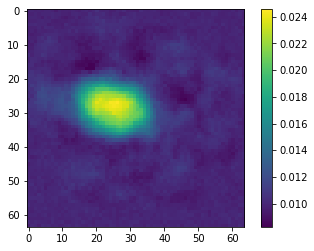

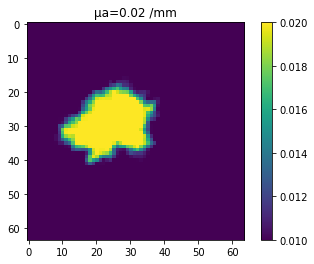

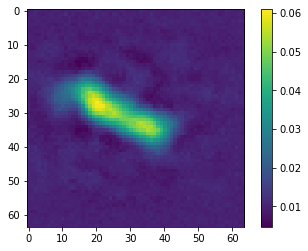

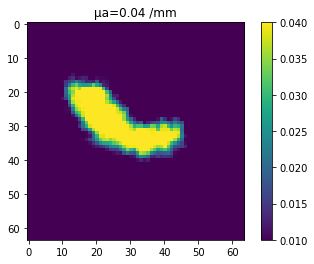

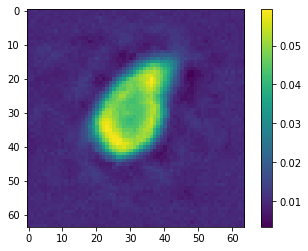

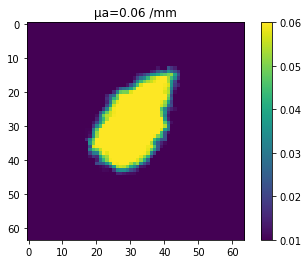

In [ ]:
#model MF1
mua_pred_A=model_A.predict(ndata_A)
mua_pred_B=model_A.predict(ndata_B)
mua_pred_C=model_A.predict(ndata_C)

#Display true and predict
mua_pred_A_m=mua_pred_A.reshape(64,64)
mua_pred_B_m=mua_pred_B.reshape(64,64)
mua_pred_C_m=mua_pred_C.reshape(64,64)

Display(mua_pred_A_m)
plt.title('\u03BCa=0.02 /mm')
Display(mua_A)

Display(mua_pred_B_m)
plt.title('\u03BCa=0.04 /mm')
Display(mua_B)

Display(mua_pred_C_m)
plt.title('\u03BCa=0.06 /mm')
Display(mua_C)

Generating image to computing SSIM

In [ ]:
generate_img(mua_pred_A_m, '/content/drive/MyDrive/DriveUploader/mua_pred_mlp(00074).png')
generate_img(mua_pred_B_m, '/content/drive/MyDrive/DriveUploader/mua_pred_mlp(03193).png')
generate_img(mua_pred_C_m, '/content/drive/MyDrive/DriveUploader/mua_pred_mlp(06215).png')

generate_img(mua_A, '/content/drive/MyDrive/DriveUploader/mua(00074).png')
generate_img(mua_B, '/content/drive/MyDrive/DriveUploader/mua(03193).png')
generate_img(mua_C, '/content/drive/MyDrive/DriveUploader/mua(06215).png')

img_pred_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_mlp(00074).png')
img_pred_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_mlp(03193).png')
img_pred_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_mlp(06215).png')

img_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua(00074).png')
img_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua(03193).png')
img_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua(06215).png')

Evaluating

In [ ]:
mae_A=MAE(mua_pred_A_m, mua_A)
mse_A=MSE(mua_pred_A_m, mua_A)
psnr_A=PSNR(mua_pred_A_m, mua_A)
ssim_A, mssim=SSIM(img_pred_A, img_A)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_A)
print('Mean Absolute Error:', mae_A)
print('Mean Squared Error:', mse_A)
print('Peak Signal to Noise Ratio:', psnr_A)

Structural Similarity: 0.4871928930765122
Mean Absolute Error: 0.0006878861337935081
Mean Squared Error: 2.020437901055515e-06
Peak Signal to Noise Ratio: 24.747893515931413


In [ ]:
mae_B=MAE(mua_pred_B_m, mua_B)
mse_B=MSE(mua_pred_B_m, mua_B)
psnr_B=PSNR(mua_pred_B_m, mua_B)
ssim_B, mssim_B=SSIM(img_pred_B, img_B)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_B)
print('Mean Absolute Error:', mae_B)
print('Mean Squared Error:', mse_B)
print('Peak Signal to Noise Ratio:', psnr_B)

Structural Similarity: 0.5746647852990725
Mean Absolute Error: 0.0018782104510976293
Mean Squared Error: 1.4927903848520134e-05
Peak Signal to Noise Ratio: 23.964833969800953


In [ ]:
mae_C=MAE(mua_pred_C_m, mua_C)
mse_C=MSE(mua_pred_C_m, mua_C)
psnr_C=PSNR(mua_pred_C_m, mua_C)
ssim_C, mssim=SSIM(img_pred_C, img_C)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_C)
print('Mean Absolute Error:', mae_C)
print('Mean Squared Error:', mse_C)
print('Peak Signal to Noise Ratio:', psnr_C)

Structural Similarity: 0.5854698564636557
Mean Absolute Error: 0.002208700671513286
Mean Squared Error: 1.8775226160006425e-05
Peak Signal to Noise Ratio: 22.72148141070626


#**Model B**

In [ ]:
MF2='/content/drive/MyDrive/model_conv_final_2.h5'
model_B=read_model(MF2)

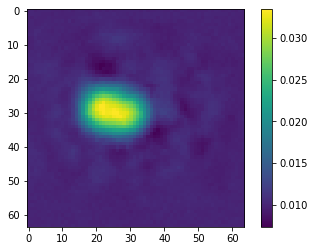

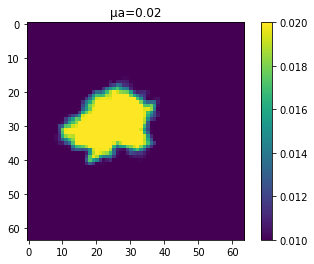

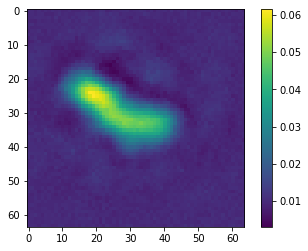

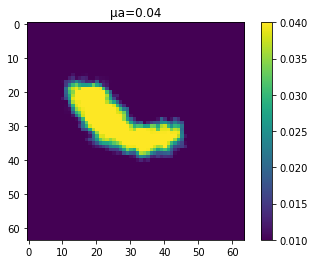

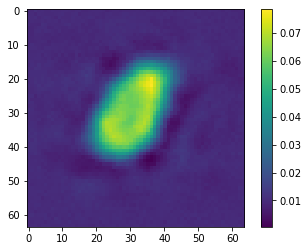

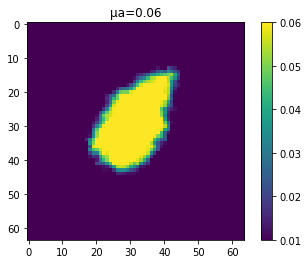

In [ ]:
#model MF2
mua_pred_A=model_B.predict(ndata_A_conv)
mua_pred_B=model_B.predict(ndata_B_conv)
mua_pred_C=model_B.predict(ndata_C_conv)

#Display true and predict
mua_pred_A_m=mua_pred_A.reshape(64,64)
mua_pred_B_m=mua_pred_B.reshape(64,64)
mua_pred_C_m=mua_pred_C.reshape(64,64)

Display(mua_pred_A_m)
plt.title('\u03BCa=0.02')
Display(mua_A)

Display(mua_pred_B_m)
plt.title('\u03BCa=0.04')
Display(mua_B)

Display(mua_pred_C_m)
plt.title('\u03BCa=0.06')
Display(mua_C)

Generating image to computing SSIM

In [ ]:
generate_img(mua_pred_A_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(00074).png')
generate_img(mua_pred_B_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(03193).png')
generate_img(mua_pred_C_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(06215).png')

img_pred_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(00074).png')
img_pred_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(03193).png')
img_pred_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(06215).png')

img_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua(00074).png')
img_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua(03193).png')
img_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua(06215).png')

Evaluating

In [ ]:
mae_A=MAE(mua_pred_A_m, mua_A)
mse_A=MSE(mua_pred_A_m, mua_A)
psnr_A=PSNR(mua_pred_A_m, mua_A)
ssim_A, mssim=SSIM(img_pred_A, img_A)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_A)
print('Mean Absolute Error:', mae_A)
print('Mean Squared Error:', mse_A)
print('Peak Signal to Noise Ratio:', psnr_A)

Structural Similarity: 0.5846726891329371
Mean Absolute Error: 0.0008876625811297143
Mean Squared Error: 4.706637910626229e-06
Peak Signal to Noise Ratio: 23.75669271466012


In [ ]:
mae_B=MAE(mua_pred_B_m, mua_B)
mse_B=MSE(mua_pred_B_m, mua_B)
psnr_B=PSNR(mua_pred_B_m, mua_B)
ssim_B, mssim_B=SSIM(img_pred_B, img_B)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_B)
print('Mean Absolute Error:', mae_B)
print('Mean Squared Error:', mse_B)
print('Peak Signal to Noise Ratio:', psnr_B)

Structural Similarity: 0.5966508422512639
Mean Absolute Error: 0.0016633973548272148
Mean Squared Error: 1.0728995191058323e-05
Peak Signal to Noise Ratio: 25.480345621425784


In [ ]:
mae_C=MAE(mua_pred_C_m, mua_C)
mse_C=MSE(mua_pred_C_m, mua_C)
psnr_C=PSNR(mua_pred_C_m, mua_C)
ssim_C, mssim=SSIM(img_pred_C, img_C)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_C)
print('Mean Absolute Error:', mae_C)
print('Mean Squared Error:', mse_C)
print('Peak Signal to Noise Ratio:', psnr_C)

Structural Similarity: 0.6431675714425181
Mean Absolute Error: 0.00188338564954904
Mean Squared Error: 1.380888929316336e-05
Peak Signal to Noise Ratio: 26.494621211727583


#Model C

In [ ]:
MF3=''
model_C=read_model(MF3)

In [ ]:
#model MF3
mua_pred_A=model_B.predict(ndata_A)
mua_pred_B=model_B.predict(ndata)
mua_pred_C=model_B.predict(ndata)

#Display true and predict
mua_pred_A_m=mua_pred_A.reshape(64,64)
mua_pred_B_m=mua_pred_B.reshape(64,64)
mua_pred_C_m=mua_pred_C.reshape(64,64)

Display(mua_pred_A_m)
plt.title('\u03BCa=0.02')
Display(mua_A)

Display(mua_pred_B_m)
plt.title('\u03BCa=0.04')
Display(mua_B)

Display(mua_pred_C_m)
plt.title('\u03BCa=0.08')
Display(mua_C)

Generating image to computing SSIM

In [ ]:
generate_img(mua_pred_A_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(00059).png')
generate_img(mua_pred_B_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(03105).png')
generate_img(mua_pred_C_m, '/content/drive/MyDrive/DriveUploader/mua_pred_conv(09117).png')

img_pred_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(00059).png')
img_pred_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(03105).png')
img_pred_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua_pred_conv(09117).png')

img_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua(00059).png')
img_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua(03105).png')
img_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua(09117).png')

Evaluating

In [ ]:
mae_A=MAE(mua_pred_A_m, mua_A)
mse_A=MSE(mua_pred_A_m, mua_A)
psnr_A=PSNR(mua_pred_A_m, mua_A)
ssim_A, mssim=SSIM(img_pred_A, img_A)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_A)
print('Mean Absolute Error:', mae_A)
print('Mean Squared Error:', mse_A)
print('Peak Signal to Noise Ratio:', psnr_A)

In [ ]:
mae_B=MAE(mua_pred_B_m, mua_B)
mse_B=MSE(mua_pred_B_m, mua_B)
psnr_B=PSNR(mua_pred_B_m, mua_B)
ssim_B, mssim_B=SSIM(img_pred_B, img_B)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_B)
print('Mean Absolute Error:', mae_B)
print('Mean Squared Error:', mse_B)
print('Peak Signal to Noise Ratio:', psnr_B)

In [ ]:
mae_C=MAE(mua_pred_C_m, mua_C)
mse_C=MSE(mua_pred_C_m, mua_C)
psnr_C=PSNR(mua_pred_C_m, mua_C)
ssim_C, mssim=SSIM(img_pred_C, img_C)
#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_C)
print('Mean Absolute Error:', mae_C)
print('Mean Squared Error:', mse_C)
print('Peak Signal to Noise Ratio:', psnr_C)

#Evaluating images that reconstructed by classic optimization

**Importing data**

In [ ]:
def mua_read_alter_sec(mat_file, name):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  img=df.to_numpy()
  return img

In [ ]:
dir_mua_rec_A='/content/drive/MyDrive/DriveUploader/mua_rec(03193).mat'
#mua_rec_A=mua_read_alter(dir_mua_rec_A, 'muarec', 25)
#dir_mua_rec_A='/content/drive/MyDrive/DriveUploader/mua_rec(00059).mat'
mua_rec_A=mua_read_alter(dir_mua_rec_A, 'muarec',25)
####
#mua_rec_A=

#dir_mua_rec_B='/content/drive/MyDrive/DriveUploader/mua_rec(03193).mat'
#mua_rec_B=mua_read_alter(dir_mua_rec_B, 'muarec', 25)

#dir_mua_rec_C='/content/drive/MyDrive/DriveUploader/mua_rec(06215).mat'
#mua_rec_C=mua_read_alter(dir_mua_rec_C, 'muarec', 25)

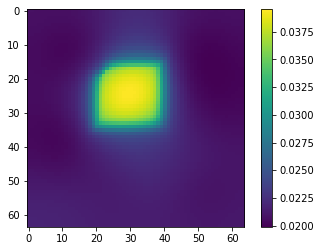

In [ ]:
#Display reconstructed image by classic method
mua_rec_A_m=mua_rec_A.reshape(64,64)
mua_rec_A_m=mua_rec_A_m
#mua_rec_B_m=mua_rec_B.reshape(64,64)
#mua_rec_C_m=mua_rec_C.reshape(64,64)

#plt.title('\u03BCa=0.02')
Display(mua_rec_A_m)
#Display(mua_A)

#plt.title('\u03BCa=0.04')
#Display(mua_rec_B_m)
#Display(mua_B)

#plt.title('\u03BCa=0.08')
#Display(mua_rec_C_m)
#Display(mua_C)

**Generating Image to compute SSIM**

In [ ]:
generate_img(mua_rec_A_m, '/content/drive/MyDrive/DriveUploader/mua_rec(00074).png')
generate_img(mua_rec_B_m, '/content/drive/MyDrive/DriveUploader/mua_rec(03193).png')
generate_img(mua_rec_C_m, '/content/drive/MyDrive/DriveUploader/mua_rec(06215).png')

img_rec_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua_rec(00074).png')
img_A=plt.imread('/content/drive/MyDrive/DriveUploader/mua(00074).png')
img_rec_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua_rec(03193).png')
img_B=plt.imread('/content/drive/MyDrive/DriveUploader/mua(03193).png')
img_rec_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua_rec(06215).png')
img_C=plt.imread('/content/drive/MyDrive/DriveUploader/mua(06215).png')

**Evaluating**

In [ ]:
mae_rec_A=MAE(mua_rec_A, mua_A)
mse_rec_A=MSE(mua_rec_A, mua_A)
psnr_rec_A=PSNR(mua_rec_A, mua_A)
ssim_rec_A, mssim_rec_A=SSIM(img_rec_A, img_A)

#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_rec_A)
print('Mean Absolute Error:', mae_rec_A)
print('Mean Squared Error:', mse_rec_A)
print('Peak Signal to Noise Ratio:', psnr_rec_A)

Structural Similarity: 0.5887800003999332
Mean Absolute Error: 0.011946946414955043
Mean Squared Error: 0.00015397542701091918
Peak Signal to Noise Ratio: 10.061458564087575


In [ ]:
mae_rec_B=MAE(mua_rec_B, mua_B)
mse_rec_B=MSE(mua_rec_B, mua_B)
psnr_rec_B=PSNR(mua_rec_B, mua_B)
ssim_rec_B, mssim_rec_B=SSIM(img_rec_B, img_B)

#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_rec_B)
print('Mean Absolute Error:', mae_rec_B)
print('Mean Squared Error:', mse_rec_B)
print('Peak Signal to Noise Ratio:', psnr_rec_B)

Structural Similarity: 0.5628842397667022
Mean Absolute Error: 0.011655923265760492
Mean Squared Error: 0.00015183067025523235
Peak Signal to Noise Ratio: 10.122377643537835


In [ ]:
mae_rec_C=MAE(mua_rec_C, mua_C)
mse_rec_C=MSE(mua_rec_C, mua_C)
psnr_rec_C=PSNR(mua_rec_C, mua_C)
ssim_rec_C, mssim_rec_A=SSIM(img_rec_C, img_C)

#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_rec_C)
print('Mean Absolute Error:', mae_rec_C)
print('Mean Squared Error:', mse_rec_C)
print('Peak Signal to Noise Ratio:', psnr_rec_C)

Structural Similarity: 0.6043892446077039
Mean Absolute Error: 0.016234671272370983
Mean Squared Error: 0.00028261488772928834
Peak Signal to Noise Ratio: 9.523732740013333


In [ ]:
dir_mua_rec_B='/content/drive/MyDrive/mua_rec.mat'
mua_rec_B=mua_read_alter_sec(dir_mua_rec_B, 'muarec')

In [ ]:
dir_mua_true='/content/drive/MyDrive/mua_true.mat'
mua_true=mua_read_alter_sec(dir_mua_true, 'muatrue')

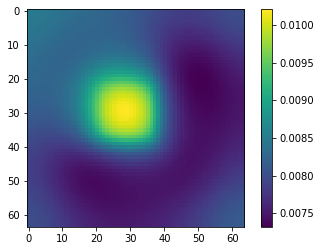

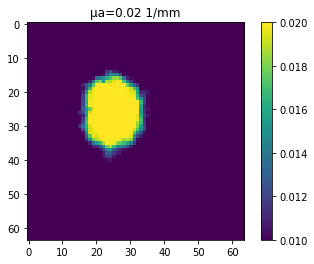

In [ ]:
mua_rec_B_m=mua_rec_B.reshape(64,64)
mua_true=mua_true.reshape(64,64)
Display(mua_rec_B_m)
plt.title('\u03BCa=0.02 1/mm')
Display(mua_true)

In [ ]:
generate_img(mua_rec_B, '/content/drive/MyDrive/DriveUploader/mua_rec.png')
generate_img(mua_true, '/content/drive/MyDrive/DriveUploader/mua_true.png')
img_rec=plt.imread('/content/drive/MyDrive/DriveUploader/mua_rec.png')
img=plt.imread('/content/drive/MyDrive/DriveUploader/mua_true.png')

In [ ]:
mae_rec=MAE(mua_rec_B, mua_true)
mse_rec=MSE(mua_rec_B, mua_true)
psnr_rec=PSNR(mua_rec_B, mua_true)
ssim_rec, mssim_rec_B=SSIM(img_rec, img)

#print('Mean Structural Similarity:', mssim)
print('Structural Similarity:', ssim_rec)
print('Mean Absolute Error:', mae_rec)
print('Mean Squared Error:', mse_rec)
print('Peak Signal to Noise Ratio:', psnr_rec)

Structural Similarity: 0.4508241893261529
Mean Absolute Error: 0.002702171791144543
Mean Squared Error: 1.1497331431279687e-05
Peak Signal to Noise Ratio: 9.57073833180095


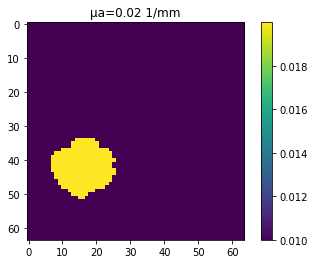

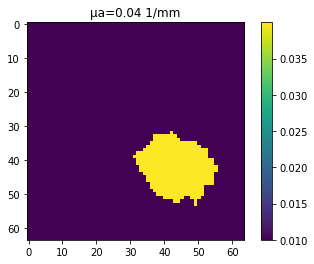

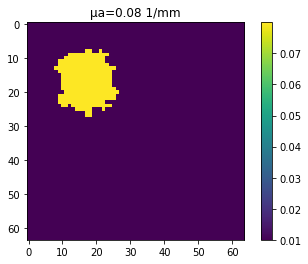

In [ ]:
from google.colab import files
img_a=plt.imread('/content/drive/MyDrive/modified images/new_mamography (59).png')
img_a_=img_a*0.01+0.01
plt.title('\u03BCa=0.02 1/mm')
Display(img_a_)


img_b=plt.imread('/content/drive/MyDrive/modified images/new_mamography (105).png')
img_b_=img_b*0.03+0.01
plt.title('\u03BCa=0.04 1/mm')
Display(img_b_)


img_c=plt.imread('/content/drive/MyDrive/modified images/new_mamography (117).png')
img_c_=img_c*0.07+0.01
plt.title('\u03BCa=0.08 1/mm')
Display(img_c_)
#plt. savefig("40.png")